<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/211016_%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## GitHub에서 데이터셋 가져오기



In [2]:
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_train_dataset2.csv"
df = pd.read_csv(DATA_PATH)
df

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Mean Wind Speed (m/s),Mean Relative Humidity(%),Mosquito Value
0,2021-08-31,20.5,18.1,23.1,2.3,93.3,82.0
1,2021-08-30,24.2,21.2,27.7,1.4,77.5,82.6
2,2021-08-29,23.7,21.9,26.3,1.6,82.6,79.3
3,2021-08-28,23.6,19.7,28.2,1.8,80.4,83.0
4,2021-08-27,22.4,20.4,25.5,1.3,83.5,79.6
...,...,...,...,...,...,...,...
1006,2016-05-05,18.9,10.2,26.9,1.7,50.8,24.4
1007,2016-05-04,15.7,10.2,20.6,5.1,46.6,25.6
1008,2016-05-03,12.9,8.9,17.6,4.9,86.1,30.4
1009,2016-05-02,21.1,16.5,28.4,2.2,64.5,27.4


In [3]:
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_test_dataset2.csv"
test = pd.read_csv(DATA_PATH)
test

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Mean Wind Speed (m/s),Mean Relative Humidity(%),Mosquito Value
0,2021-10-14,19.7,17.4,23.9,2.0,73.6,54.0
1,2021-10-13,19.6,14.9,25.2,2.4,66.6,43.2
2,2021-10-12,17.9,15.8,21.3,3.3,67.1,51.0
3,2021-10-11,15.2,12.6,17.8,2.2,78.6,63.1
4,2021-10-10,19.9,14.9,24.3,2.2,89.0,59.7
5,2021-10-09,20.9,18.5,24.1,2.3,83.5,61.1
6,2021-10-08,18.8,17.5,20.0,1.7,91.3,61.1
7,2021-10-07,19.4,17.9,21.9,1.9,85.5,73.9
8,2021-10-06,18.8,17.9,21.7,2.8,91.5,65.5
9,2021-10-05,23.6,21.7,26.5,3.3,82.4,58.4


In [19]:
train=df.sample(frac=0.8)
val=df.sample(frac=0.2)

In [20]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

val-=mean
val/=std

train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

val_data_set = val.values
x_val = val_data_set[:, 2:-1].astype(float)
y_val = val_data_set[:, -1].astype(float)

### 모델 구성

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 4, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [22]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

### 모델 학습 + 학습과정 및 결과보기

In [23]:
hist=model.fit(x_train, y_train, epochs=80, batch_size=4,validation_data=(x_val,y_val))

Epoch 1/80
203/203 [==============================] - 2s 10ms/step - loss: 0.7345 - mae: 0.6837 - val_loss: 0.7142 - val_mae: 0.6730
Epoch 2/80
203/203 [==============================] - 2s 8ms/step - loss: 0.6514 - mae: 0.6436 - val_loss: 0.6655 - val_mae: 0.6424
Epoch 3/80
203/203 [==============================] - 2s 9ms/step - loss: 0.6203 - mae: 0.6305 - val_loss: 0.6248 - val_mae: 0.6208
Epoch 4/80
203/203 [==============================] - 2s 9ms/step - loss: 0.6362 - mae: 0.6342 - val_loss: 0.6242 - val_mae: 0.6161
Epoch 5/80
203/203 [==============================] - 2s 9ms/step - loss: 0.6144 - mae: 0.6277 - val_loss: 0.6695 - val_mae: 0.6555
Epoch 6/80
203/203 [==============================] - 2s 9ms/step - loss: 0.5988 - mae: 0.6163 - val_loss: 0.5986 - val_mae: 0.5857
Epoch 7/80
203/203 [==============================] - 2s 9ms/step - loss: 0.6189 - mae: 0.6204 - val_loss: 0.6390 - val_mae: 0.6290
Epoch 8/80
203/203 [==============================] - 2s 9ms/step - loss: 0

### mae와 val_mae 비교

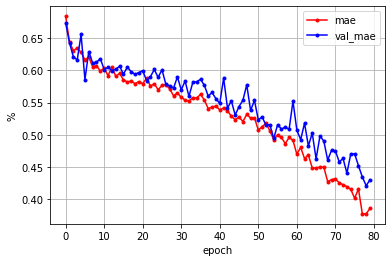

In [24]:
import matplotlib.pyplot as plt

y_mae = hist.history['mae']
y_val_mae = hist.history['val_mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(80)
plt.plot(x_len, y_mae, marker='.', c='red', label="mae")
plt.plot(x_len, y_val_mae, marker='.', c='blue', label="val_mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,100)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mse(loss)와 val_mse 비교

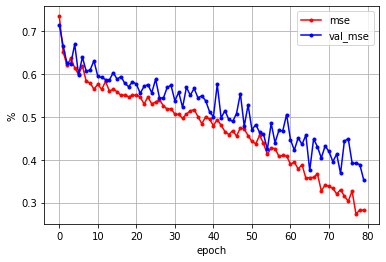

In [25]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_val_mse = hist.history['val_loss']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(80)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_val_mse, marker='.', c='blue', label="val_mse")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,100)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

In [27]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.7345086932182312, 0.6513884663581848, 0.6202532052993774, 0.6362482905387878, 0.6143956184387207, 0.5988473892211914, 0.6188942790031433, 0.5825083255767822, 0.5791365504264832, 0.5642319321632385, 0.5759415626525879, 0.5639992952346802, 0.5823861956596375, 0.5605311393737793, 0.5637602210044861, 0.5587647557258606, 0.5497236251831055, 0.5510956048965454, 0.5468184351921082, 0.5497987866401672, 0.5511133670806885, 0.5463564991950989, 0.5298790335655212, 0.5461614727973938, 0.530235230922699, 0.5344883799552917, 0.5399432182312012, 0.5259202718734741, 0.5178554654121399, 0.5191469788551331, 0.5062100887298584, 0.5054342150688171, 0.496488094329834, 0.5061332583427429, 0.5139448642730713, 0.5168195366859436, 0.5005764365196228, 0.4837268590927124, 0.5002849102020264, 0.49425584077835083, 0.4796511232852936, 0.4933731257915497, 0.480523020029068, 0.46563979983329773, 0.45870012044906616, 0.4677315354347229, 0.45530208945274353, 0.4740675389766693, 0.47161039

### 모델 평가

In [28]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2/2 [==============================] - 0s 8ms/step - loss: 2.3966 - mae: 1.5400
## evaluation loss and_metrics ##
[2.3965940475463867, 1.5399514436721802]


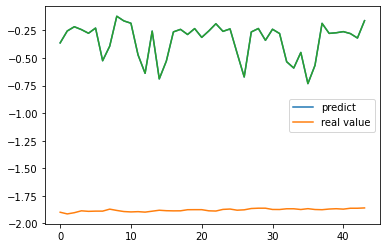

In [29]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
plt.plot(model.predict(x_test))
# plt.plot(model.predict(x_test)-y_test)
#plt.xlim(0,20)
plt.legend()
plt.show()